In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

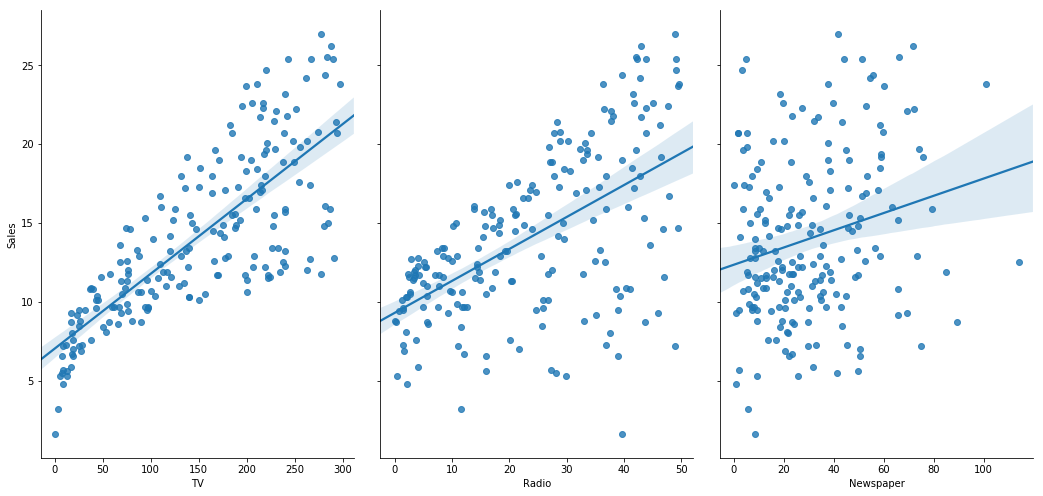

In [5]:
#Sales is our response variable which is continuous and thus we will use Regression
#But first visualize the relationship between the features and the response variable using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [6]:
#create a list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']
#select a subset of the original dataframe
X = data[feature_cols] # or X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [8]:
#select a Series of the df
y = data['Sales'] #or y = data.Sales if there is no space in the name of the Series
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [9]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [10]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#default split is 75% training and 25% testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [12]:
#instantiate the model
linreg = LinearRegression()
#fit the model (learn the coefficients for the line of best fit)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#print the intecept and the coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [14]:
#pair the feature columns with the coefficients
print(list(zip(feature_cols, linreg.coef_)))

[('TV', 0.04656456787415028), ('Radio', 0.17915812245088836), ('Newspaper', 0.0034504647111804347)]


In [15]:
#making predictions on the testing set
y_pred = linreg.predict(X_test)

In [16]:
#evaluation metrics for linear regression
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
#Mean Absolute Error (MAE)
metrics.mean_absolute_error(true, pred)

10.0

In [17]:
#Mean Squared Error (MSE)
metrics.mean_squared_error(true, pred)

150.0

In [18]:
#Root Mean Squared Error (RMSE)
#RMSE larger that MAE cause it squares the Errors and thus increased the weight of larger errors
np.sqrt(metrics.mean_squared_error(true, pred))

12.24744871391589

In [19]:
#Computing RMSE for the sales predictions
#1.4 is pretty good giving that the sales ranged from about 5 to 25
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [20]:
#see if Newspaper improves the quality of the model or not
#feature selection or remove features
X = feature_cols = data[['TV', 'Radio']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [22]:
#Feature selection with cross-validation
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [24]:
#10-fold cross-validation
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [25]:
#work around the negative values to root them cause we need RMSE
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [28]:
#convert MSE to RMSE and take the average value
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6913531708051792


In [29]:
#compare the model without the feature 'Newspaper'
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales

In [31]:
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766


In [ ]:
'''Conclusion: Without the feature 'Newspaper' the model is better. Repeated cross-validation, though, is a more
reliable estimate of out-of-sample performance, since it is reducing the variance associated with a single trial. Another
reliable procedure is the hold-out set. Finally feature selection and engineering is better to occur within each cross-
validation iteration. Cost-benefit choise to make here!'''